<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Upload a notebook to connect that:

-   Uses your Planck function (or mine) and numpy.diff to find

    $$\frac{dE_\lambda}{d\lambda}$$

    for a range of wavelengths between 0.1 - 20 microns and
    temperatures of Temp = 250 K, 300 K, 350 K, 400 K.

-   With day3\_datetime.ipynb\_ Section 3 as a guide, plot these 4
    curves with a legend and show that each one passes through
    0 (i.e. the Planck function reaches a maximum) at a wavelength
    of:

    $$\lambda_{max} = \frac{a}{Temp}$$

    in agreement with Stull 2.14 (Wien's law)

    (i.e. -- your graph should have 4 lines, a legend, and four
    colored dots at coordinates ($\lambda_{max}$, 0) that hopefully
    lie on appropriate the line.


In [5]:
import numpy as np
from matplotlib import pyplot as plt
#
# get Stull's c_1 and c_2 from fundamental constants
#
c=2.99792458e+08  #m/s -- speed of light in vacuum
h=6.62606876e-34  #J s  -- Planck's constant
kb=1.3806503e-23  # J/K  -- Boltzman's constant
c=3.e8  #speed of light in vacuum (m/s)
c1=2.*h*c**2.*np.pi
c2=h*c/kb
sigma=2.*np.pi**5.*kb**4./(15*h**3.*c**2.)

def planckwavelen(wavel,Temp):
    """
    Calculate the blackbody radiant exitence (Stull 2.13)
    
    Parameters
    ----------
    
      wavel: float or array
           wavelength (meters)
           
      Temp: float
           temperature (K)
           
    Returns
    -------
    
    Elambda:  float or arr
           monochromatic radiant exitence (W/m^2/m)
    """
    Elambda=c1/(wavel**5.*(np.exp(c2/(wavel*Temp)) -1))
    return Elambda


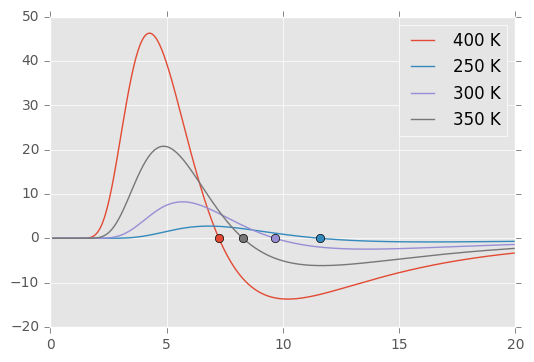

In [6]:
%matplotlib inline
a= 2897.  #micron Kelvins -- Stull eq. 2.14
Temps = [250, 300, 350, 400]  #Kelvins
wavelengths = np.arange(0.1, 20,0.01)  #microns
#
# initialize a dictionary with empty lists
#
# below I do it the long way
#
# shorter way, use defaultdict:
# from collections import defaultdict
# hold_dict = defaultdict(list)
#
#
hold_dict={}
for a_temp in Temps: 
    hold_dict[a_temp] = []
    
dlambda = np.diff(wavelengths)
#
# empty list hold_list to hold the wavelengths of maxima
#
hold_max=[]
for a_temp in Temps:
    E_vals = planckwavelen(wavelengths*1.e-6,a_temp)*1.e-6  #W/m^2/micron
    dE = np.diff(E_vals)
    deriv = dE/dlambda
    hold_dict[a_temp]=deriv
    hold_max.append(a/a_temp)
  
plt.close('all')
avg_wavelength=(wavelengths[1:] + wavelengths[:-1])/2.
fig, ax = plt.subplots(1,)
for a_temp in hold_dict.keys():
    deriv = hold_dict[a_temp]
    max_wavelen = a/a_temp
    line_label = "{} K".format(a_temp)
    the_line=ax.plot(avg_wavelength,deriv,label=line_label)
    #
    # make the points and lines the same color
    #
    color=the_line[0].get_color()
    ax.plot(max_wavelen,0,'o',color=color)
_=ax.legend()
    

## 